In [1]:
import seaborn as sns
import osmnx as ox
ox.config(log_console = True, use_cache = True)
ox.__version__
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

In [2]:
import geopandas as gpd
import networkx as nx
import requests
from shapely.ops import cascaded_union
from shapely.geometry import Point, Polygon

### Mappings of counties

* Avcilar, BEYLIKDÜZÜ, BEYKOZ, BAKIRKÖY, BAGCILAR, Sultanbeyli, Esenyurt, ATASEHIR

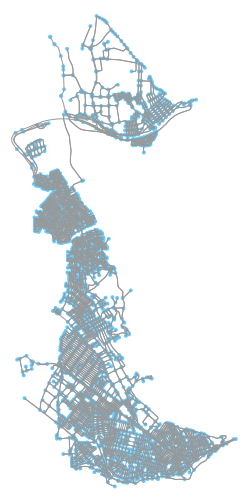

In [3]:
AVCILAR = ox.graph_from_place('AVCILAR, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(AVCILAR, fig_height = 9)

In [11]:
AVCILAR_proj = ox.project_graph(AVCILAR)
node_proj = ox.graph_to_gdfs(AVCILAR_proj, edges = False)
graph_area_m = node_proj.unary_union.convex_hull.area
graph_area_m

58559004.30221557

In [31]:
ox.basic_stats(AVCILAR_proj, area=graph_area_m, clean_intersects=True, circuity_dist='euclidean')

{'n': 4331,
 'm': 12118,
 'k_avg': 5.595936273377973,
 'intersection_count': 4084,
 'streets_per_node_avg': 3.0595705379819904,
 'streets_per_node_counts': {0: 0, 1: 247, 2: 3, 3: 3345, 4: 721, 5: 11, 6: 4},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.057030708843223275,
  2: 0.0006926806742091896,
  3: 0.7723389517432464,
  4: 0.16647425536827523,
  5: 0.002539829138767028,
  6: 0.0009235742322789194},
 'edge_length_total': 915181.4349999944,
 'edge_length_avg': 75.52248184518851,
 'street_length_total': 511087.9290000011,
 'street_length_avg': 78.41177186253469,
 'street_segments_count': 6518,
 'node_density_km': 73.95959087091475,
 'intersection_density_km': 69.74162297779169,
 'edge_density_km': 15628.36400490793,
 'street_density_km': 8727.742814108336,
 'circuity_avg': 1.0270095844305092,
 'self_loop_proportion': 0.0005776530780656874,
 'clean_intersection_count': 2635,
 'clean_intersection_density_km': 44.997349791009086}

In [19]:
Avcilar_stats = ox.extended_stats(AVCILAR, ecc=True, bc=True, cc=True)

In [20]:
Avcilar_stats['radius']

6320.6280000000015

In [21]:
Avcilar_stats['diameter']

12634.761000000002

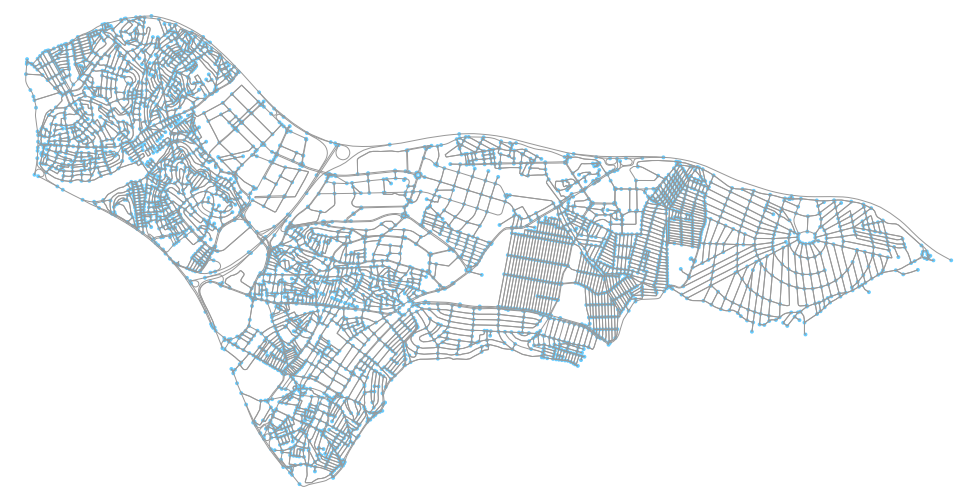

In [4]:
ATASEHIR = ox.graph_from_place('ATASEHIR, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(ATASEHIR, fig_height = 9)stats = ox.extended_stats(BEYLIKDÜZÜ, ecc=True, bc=True, cc=True)

In [16]:
Atasehir_stats = ox.extended_stats(ATASEHIR, ecc=True, bc=True, cc=True)

In [17]:
Atasehir_stats['diameter']

13331.048999999997

In [18]:
Atasehir_stats['radius']

6540.638

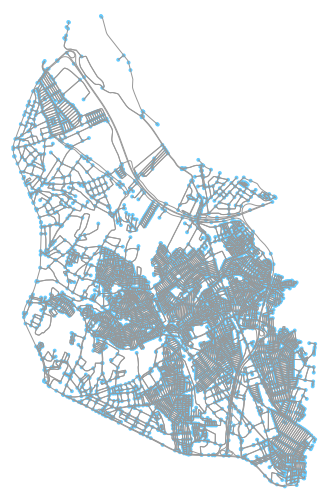

In [5]:
Esenyurt = ox.graph_from_place('Esenyurt, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(Esenyurt, fig_height = 9)

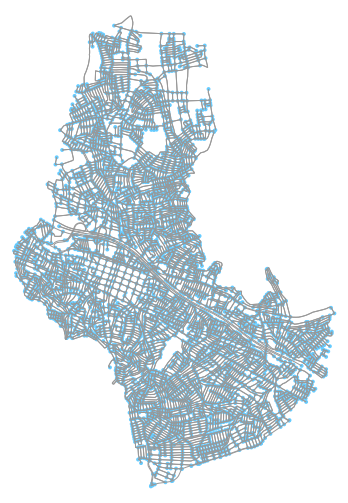

In [6]:
Sultanbeyli = ox.graph_from_place('Sultanbeyli, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(Sultanbeyli, fig_height = 9)

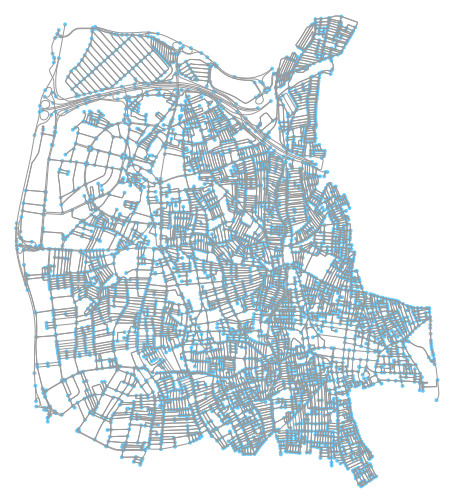

In [7]:
BAGCILAR = ox.graph_from_place('BAGCILAR, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(BAGCILAR, fig_height = 9)

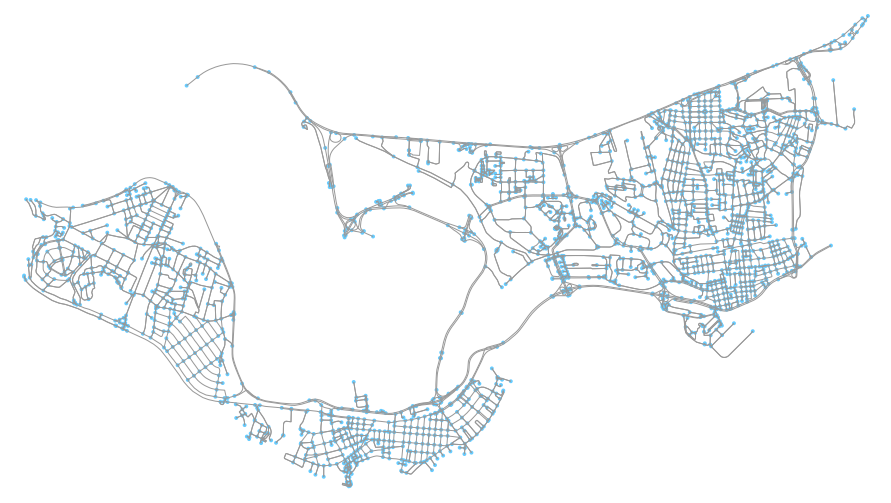

In [8]:
BAKIRKÖY = ox.graph_from_place('BAKIRKÖY, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(BAKIRKÖY, fig_height = 9)

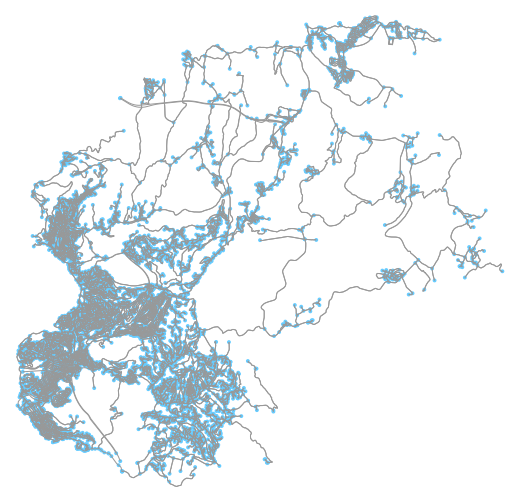

In [9]:
BEYKOZ = ox.graph_from_place('BEYKOZ, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(BEYKOZ, fig_height = 9)stats = ox.extended_stats(BEYLIKDÜZÜ, ecc=True, bc=True, cc=True)

In [28]:
Beykoz_stats = ox.extended_stats(BEYKOZ, ecc=True, bc=True, cc=True)

In [29]:
Beykoz_stats['radius']

19673.733

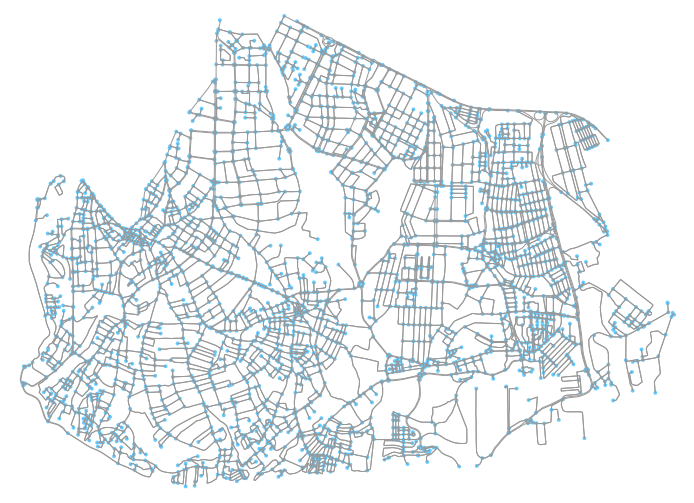

In [10]:
BEYLIKDÜZÜ = ox.graph_from_place('BEYLIKDÜZÜ, Istanbul, Turkey', network_type='drive')
fig, ax = ox.plot_graph(BEYLIKDÜZÜ, fig_height = 9)

In [12]:
BEYLIKDÜZÜ_proj = ox.project_graph(BEYLIKDÜZÜ)
node_proj = ox.graph_to_gdfs(BEYLIKDÜZÜ_proj, edges = False)
graph_area_meters = node_proj.unary_union.convex_hull.area
graph_area_meters

40719815.81639128

In [30]:
ox.basic_stats(BEYLIKDÜZÜ_proj, area=graph_area_meters, clean_intersects=True, circuity_dist='euclidean')

{'n': 3612,
 'm': 9273,
 'k_avg': 5.134551495016611,
 'intersection_count': 3277,
 'streets_per_node_avg': 2.9905869324473975,
 'streets_per_node_counts': {0: 0, 1: 335, 2: 2, 3: 2650, 4: 613, 5: 11, 6: 1},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.09274640088593578,
  2: 0.0005537098560354374,
  3: 0.7336655592469546,
  4: 0.16971207087486156,
  5: 0.003045404208194906,
  6: 0.0002768549280177187},
 'edge_length_total': 946553.8529999987,
 'edge_length_avg': 102.07633484309271,
 'street_length_total': 552900.5299999996,
 'street_length_avg': 102.90350455983614,
 'street_segments_count': 5373,
 'node_density_km': 88.70374110449762,
 'intersection_density_km': 80.47678837193763,
 'edge_density_km': 23245.533753592634,
 'street_density_km': 13578.168734678706,
 'circuity_avg': 1.0595013410362337,
 'self_loop_proportion': 0.0011862396204033216,
 'clean_intersection_count': 2227,
 'clean_intersection_density_km': 54.69081712063018}

In [13]:
stats = ox.extended_stats(BEYLIKDÜZÜ, ecc=True, bc=True, cc=True)

In [14]:
stats['diameter']

12915.766999999994

In [15]:
stats['radius']

6512.962

## Visualization of street centrality

* In graph theory and network analysis, indicators of centrality identify the most important vertices within a graph


* BEYLIKDÜZÜ, ATASEHIR, BAGCILAR, Sultanbeyli, Beykoz

In [22]:
edge_centrality = nx.closeness_centrality(nx.line_graph(BEYLIKDÜZÜ))

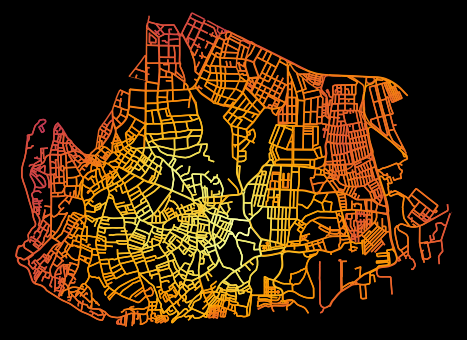

In [23]:
BEYLIKDÜZÜ_edge_values = [edge_centrality[edge + (0,)] for edge in BEYLIKDÜZÜ.edges()]

norm = colors.Normalize(vmin=min(BEYLIKDÜZÜ_edge_values)*0.8, vmax=max(BEYLIKDÜZÜ_edge_values))

cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

ec = [cmap.to_rgba(cl) for cl in BEYLIKDÜZÜ_edge_values]

fig, ax = ox.plot_graph(BEYLIKDÜZÜ, bgcolor='k', axis_off=True, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)


In [24]:
Atasehir_edge_centrality = nx.closeness_centrality(nx.line_graph(ATASEHIR))

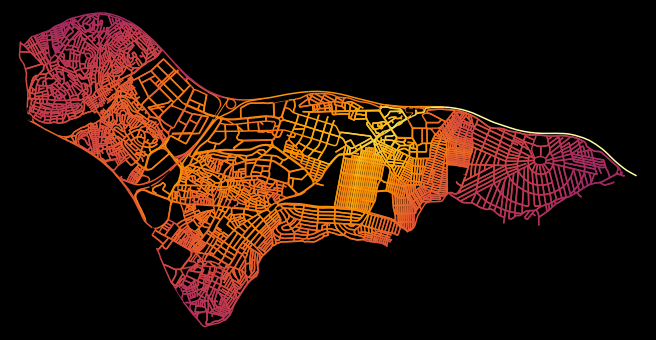

In [32]:
Atasehir_edge_values = [Atasehir_edge_centrality[edge + (0,)] for edge in ATASEHIR.edges()]

norm = colors.Normalize(vmin=min(Atasehir_edge_values)*0.8, vmax=max(Atasehir_edge_values))

cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

ec = [cmap.to_rgba(cl) for cl in Atasehir_edge_values]

fig, ax = ox.plot_graph(ATASEHIR, bgcolor='k', axis_off=True, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)


In [27]:
Beykoz_edge_centrality = nx.closeness_centrality(nx.line_graph(BEYKOZ))

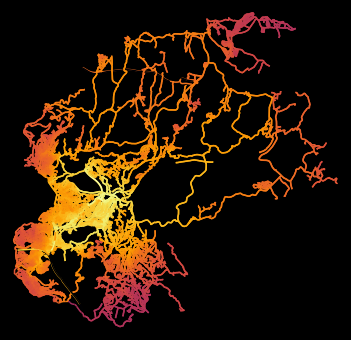

In [33]:
Beykoz_edge_values = [Beykoz_edge_centrality[edge + (0,)] for edge in BEYKOZ.edges()]

norm = colors.Normalize(vmin=min(Beykoz_edge_values)*0.8, vmax=max(Beykoz_edge_values))

cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

ec = [cmap.to_rgba(cl) for cl in Beykoz_edge_values]

fig, ax = ox.plot_graph(BEYKOZ, bgcolor='k', axis_off=True, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)


In [26]:
Sultanbeyli_edge_centrality = nx.closeness_centrality(nx.line_graph(Sultanbeyli))

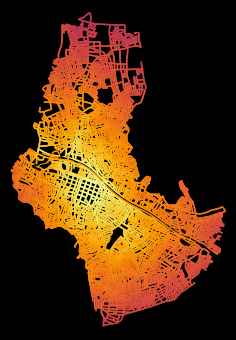

In [34]:
Sultanbeyli_edge_values = [Sultanbeyli_edge_centrality[edge + (0,)] for edge in Sultanbeyli.edges()]

norm = colors.Normalize(vmin=min(Sultanbeyli_edge_values)*0.8, vmax=max(Sultanbeyli_edge_values))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in Sultanbeyli_edge_values]



fig, ax = ox.plot_graph(Sultanbeyli, bgcolor='k', axis_off=True, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

In [25]:
Bagcilar_edge_centrality = nx.closeness_centrality(nx.line_graph(BAGCILAR))

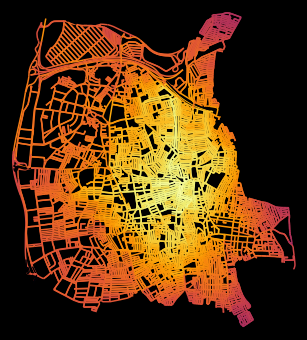

In [35]:
Bagcilar_edge_values = [Bagcilar_edge_centrality[edge + (0,)] for edge in BAGCILAR.edges()]

norm = colors.Normalize(vmin=min(Bagcilar_edge_values)*0.8, vmax=max(Bagcilar_edge_values))

cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)

ec = [cmap.to_rgba(cl) for cl in Bagcilar_edge_values]

fig, ax = ox.plot_graph(BAGCILAR, bgcolor='k', axis_off=True, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=1)